# Part 2

# 01. Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [2]:
# Store path to main project folder
path = r'/Users/emilycurcio/Desktop/CareerFoundry/Data Immersion/Ach 4 Python Fundamentals/03-2024 Instacart Basket Analysis'

In [3]:
# Import latest data set
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_all.pkl'))

In [4]:
ords_prods_all.shape

(32404859, 32)

In [5]:
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_freq_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 03. Question 3

Text(0.5, 1.0, 'Busiest Hours of the Day')

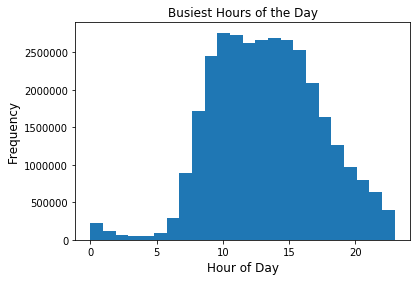

In [6]:
# Create histogram of order_hour_of_day
hist = ords_prods_all['order_hour_of_day'].plot.hist(bins = 24)

plt.ylabel('Frequency', fontsize = 12)
plt.xlabel('Hour of Day', fontsize = 12)
plt.title('Busiest Hours of the Day', fontsize = 12)

#### From the above histogram we can see that most orders are made between about 10am and 5pm. Orders peak in this time window and then gradually decrease. Orders are at their lowest between about 1am and 6am. This makes sense as some people may stay up late (until midnight) and place orders, however most people are likely sleeping between 1am and 6am. While most orders are during regular business hours, Instacart will have to consider that a substantial amount of orders are place in the late afternoon and into the evening.

In [9]:
# Export as png
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hod.png'), bbox_inches = 'tight')

# 04. Question 4

Text(0.5, 1.0, 'Customer Loyalty')

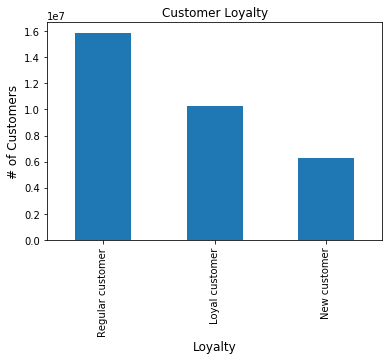

In [11]:
# Bar chart of customer loyalty
bar = ords_prods_all['loyalty_flag'].value_counts().plot.bar()

plt.ylabel('# of Customers', fontsize = 12)
plt.xlabel('Loyalty', fontsize = 12)
plt.title('Customer Loyalty', fontsize = 12)

In [12]:
# Export as png
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'), bbox_inches = 'tight')

# 05. Question 5

In [13]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [14]:
# Store 70% of the sample in the df big
big = ords_prods_all[dev]

In [15]:
# Store 30% of the sample in the df small
small = ords_prods_all[~dev]

In [16]:
# Check
len(ords_prods_all)

32404859

In [17]:
len(big) + len(small)

32404859

In [18]:
# Only take required columns from the df
df_2 = small[['order_hour_of_day','prices']]

In [19]:
df_2.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


Text(0.5, 1.0, 'Spending Across 24 Hour Day')

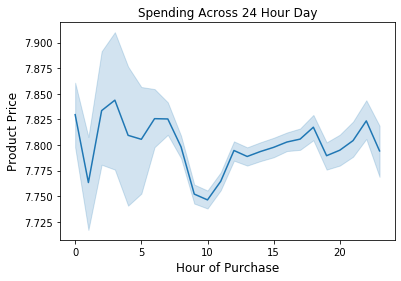

In [22]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

plt.ylabel('Product Price', fontsize = 12)
plt.xlabel('Hour of Purchase', fontsize = 12)
plt.title('Spending Across 24 Hour Day', fontsize = 12)

In [23]:
# Export as png
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_price_by_hour.png'), bbox_inches = 'tight')

# 06. Question 6

In [27]:
# Only take required columns from the df
df_3 = small[['age','n_dependants']]

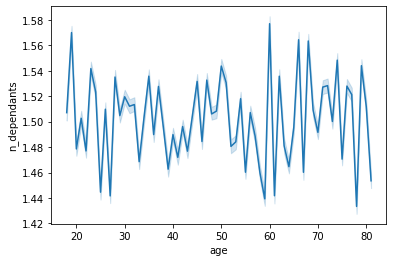

In [28]:
# Create line chart
line2 = sns.lineplot(data = df_3, x = 'age', y = 'n_dependants')

#### The line chart is showing no particualr correlation between age and number of dependants. Every age has a range of number of dependants. You could perhaps conclude that the average number of dependants for customers is 1.5, however this is independent of the customers' ages.

In [31]:
# Export as png
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

# 07. Question 7

In [32]:
# Only take required columns from the df
df_4 = small[['age','income']]

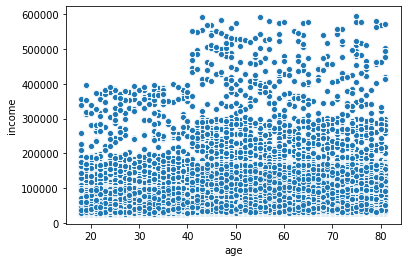

In [34]:
# Create scatter plot
scatter = sns.scatterplot(x = 'age', y = 'income', data = df_4)

#### Age 40 appears to be a significant landmark for an increase in income. The majority of customers under age 40 have an income under 200,000 dollars, with the max income for customers under age 40 being about 400,000 dollars. The majority of customers over age 40 have an income under 300,000 dollars, with the max income for customers over age 40 being about 600,000 dollars. Customers over age 40 have a higher income and therefore may have more money to spend on groceries. Perhaps they have larger families and so need more groceries, or they are single but can afford to buy higher end groceries such as organic produce. Either way there may be a correlation between age and prices, however further investigation is needed.

In [38]:
# Export as png
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))